In [2]:
from src.data_importer import CaseImporter
from src.file_graph import FileGraph
import networkx as nx
import matplotlib.pyplot as plt

importer = CaseImporter()
cases = importer.import_cases("./data/claims.csv")

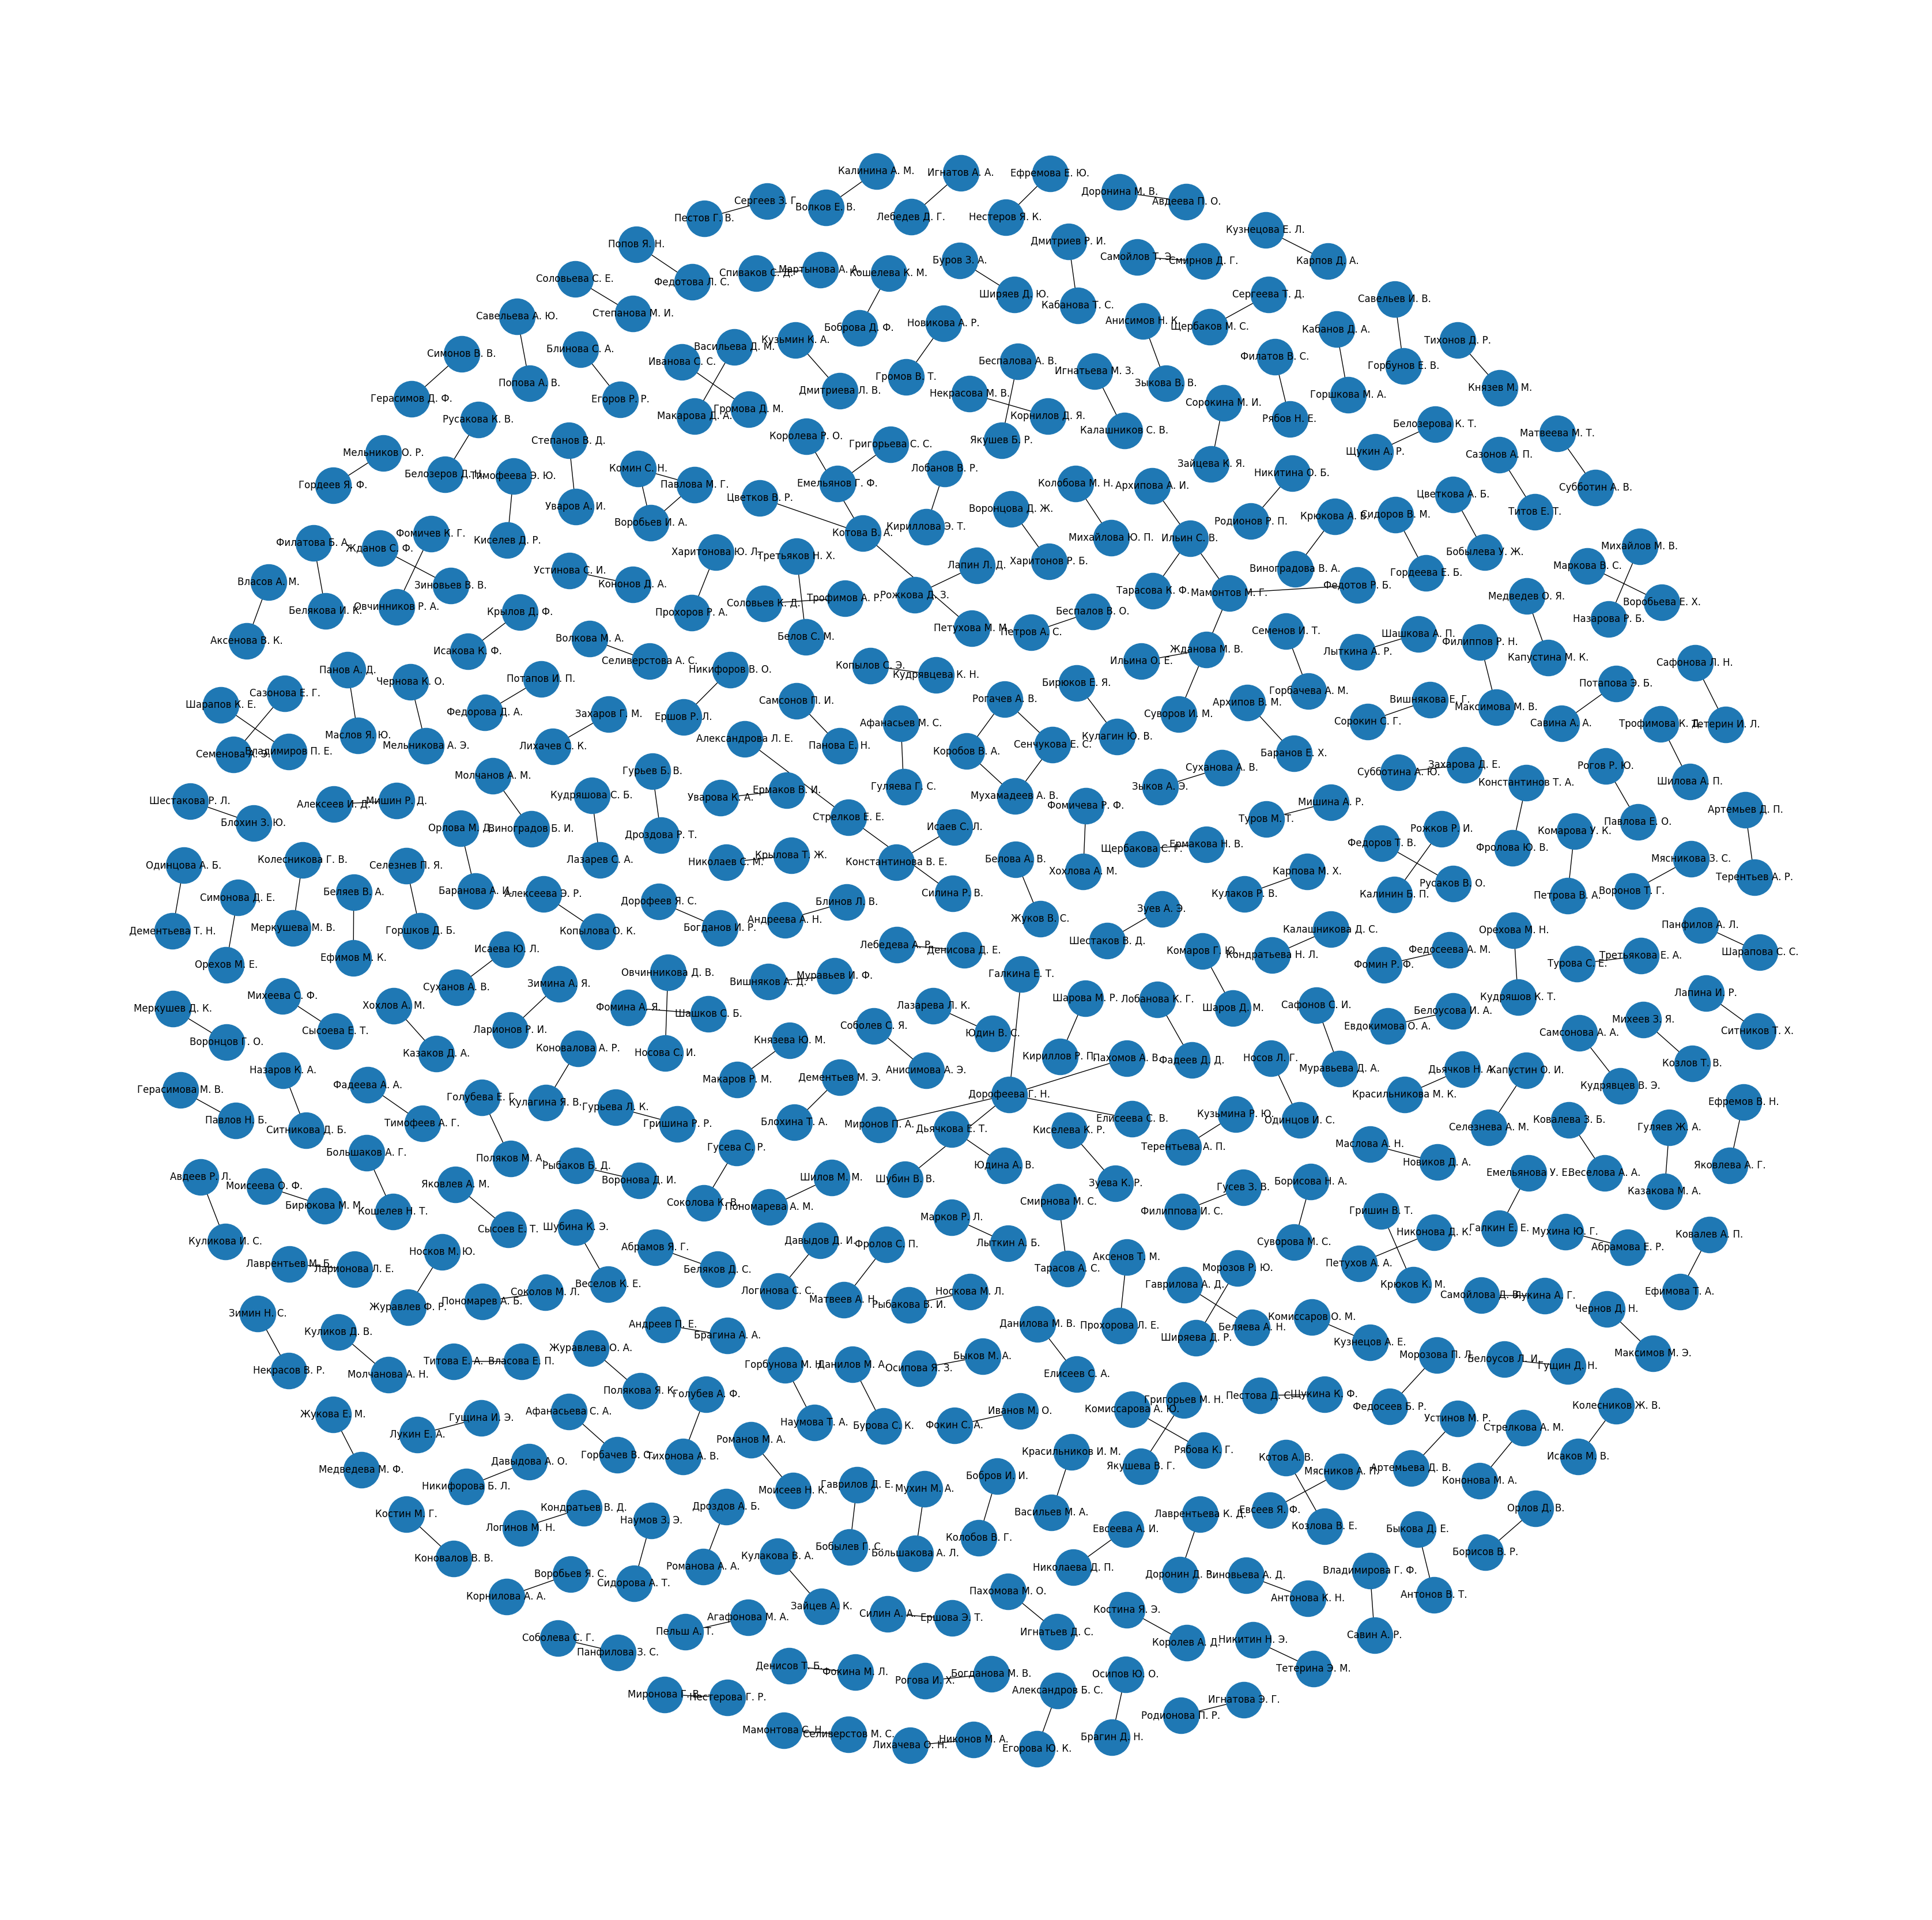

In [23]:
from networkx.algorithms.components import connected_components, number_connected_components

basic_graph = FileGraph(edge_len=0.1)
basic_graph.add_cases(cases)

plt.figure(figsize=(43 , 43))
plt.margins(0.05)
pos = nx.spring_layout(basic_graph._graph, weight="length", seed=1)
basic_graph.draw(pos, node_size=2000)

In [4]:
# Populate graph
comps_graph = FileGraph(edge_len=0.1)
comps_graph._graph.clear()
comps_graph.add_cases(cases)

comps = []

for c in connected_components(basic_graph._graph):
    if len(c) < 3:
        comps_graph._graph.remove_nodes_from(c)
    else:
        comps.append(c)

6


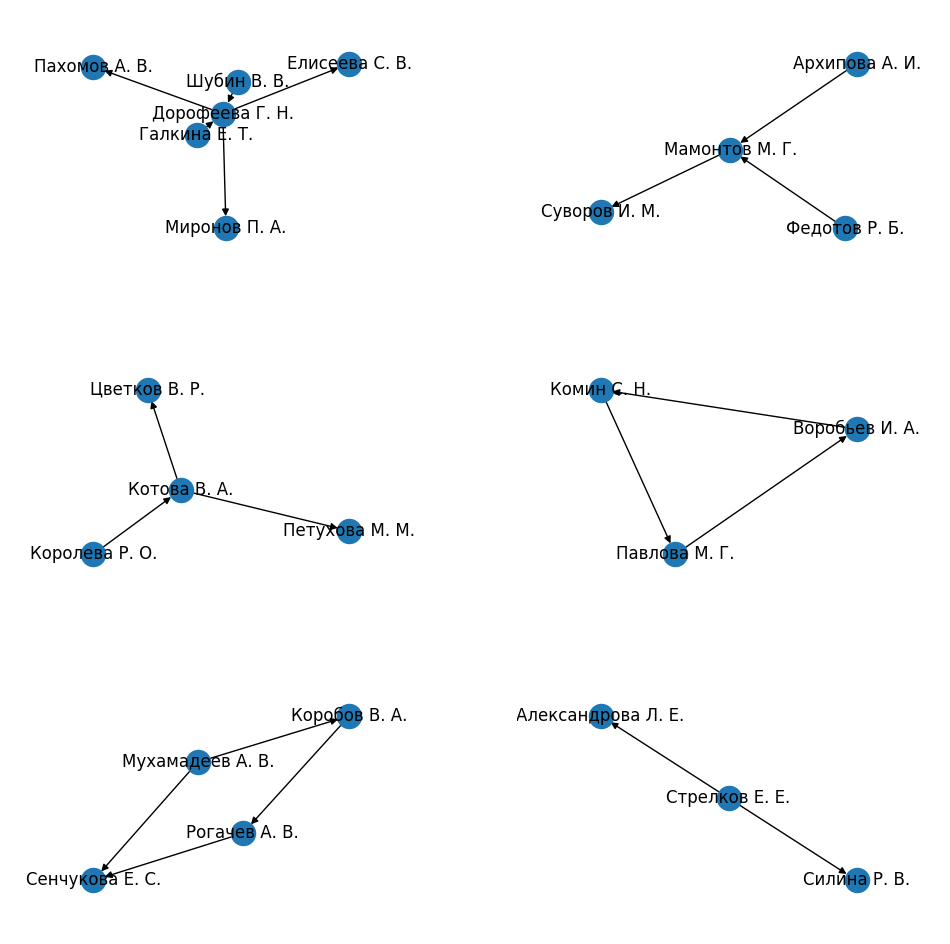

In [12]:
pos = nx.spring_layout(comps_graph._graph, weight="length")
# pos = nx.layout.circular_layout(comps_graph._graph)

fig = plt.figure(figsize=(12 , 12))
axgrid = fig.add_gridspec(3, 2)
print(len(comps))

dir_graph = FileGraph(edge_len=0.2, graph_cls=nx.DiGraph)
dir_graph.add_cases(cases)

for i, c in enumerate(sorted(comps, key=len, reverse=True)):
    pos_x = i % 3
    pos_y = i // 3

    subax = fig.add_subplot(axgrid[pos_x, pos_y])
    subax.margins(0.25)
    plt.axis("off")
    subgr = dir_graph._graph.subgraph(c)
    pos = nx.spring_layout(subgr, seed=1)
    nx.draw_networkx_nodes(subgr, pos, ax=subax)
    nx.draw_networkx_edges(subgr, pos, ax=subax)
    nx.draw_networkx_labels(subgr, pos, ax=subax)

